<h1><center><font color='tomato'>Plan your Airbnb Stay in NYC</font></center></h1>
<h5><center>Written & Published by Quoc-Anh Duong, Jul 17th 2019</center></h5>

### A few notes from the Author:

I built this notebook to demonstrate how Python could help solve real world problems by performing complex tasks that Excel is sometimes incapable of. 

But more importantly, I want to show how I can deliver a full data analysis package using this tool. From searching the data, understanding and setting a meaningful goals to analyzing, visualizing and documenting.

In this project, I've utilized some of these following technical skills: 
- Loading (local file, online source, zipfile extract)
- Processing (formatting, transforming, merging, filtering, functions, sorting, etc.)
- Analysis (statistical summary, aggregation) 
- Visualization (matplotlib, geomap)
- Machine Learning (optimization)

I am inspired to enter the Data Science field, and I want to show you how I could to advance from practical business analyst to higher level of analytics and machine learning  

### Introduction:

Ever since Airbnb launched its hospitality service to the world, it's shaped the travelling experience of millions of peopple, bringing a whole new experience to both the host and the guest. To many people including myself, planning is half the fun of travel. And to many people including myself, the planning process is even more "fun" and intense when your time and budget are limited while trying to visit as many places as possible, whether it's for vacation or business purposes. A great big city like New York City requires careful planning, especially when it's your first time or when you have a few contraints and targets to meet. There are 3 factors that universally influence one's decision on booking a room:  
1. Price
2. Quality
3. Distance 

This Jupyter notebook is my attempt to help you plan the NYC trip. In particular, this notebook will provide you some useful information that might help you get the best out of your Airbnb expense. This exercise is built in a linear step-by-step fashion way, meaning the preceding input will have impact on the following ones. Here's how it works:

Within a price range and specific type of room, the first objective is using statistical analysis & visualization to point out areas in which the average score of all the listings in the area is higher than the average score in the city. The comparison is between various neighborhoods in NYC (all of Manhattan and area close to Manhattan in Brookly and Queens). Details about my analysis will be included in the notebook. 

After selecting the area, the notebook will ask you plan your itinerary to plan a full circle trip starting & ending from where you stay and visiting all the tourist attractions (you can edit this list too as well). As you may have guessed, the exercise's second objective is to draw the shortest itinerary. This notebook also has an optimization model to give you a small challenge to see if your itinerary plan is better than the model's. 

At this point, we've covered all 3 factors mentioned above and hopefully you will learn some new information and have some fun as much as I did when I wrote this notebook :)

Because the city is big and there are thousands of options to choose, I will draw some parameters, which are also the inputs I will use and analyze. All the comments I have in the notebook will be based on those inputs. And of course you can change the inputs as you wish.    

### Table of Contents:
- Data Import & Processing:
    - Import & Formatting Airbnb Data
    - Import & Merge NYC Geomap, Zipcode Latitude and Longtitude, Neighborhood Info and Tourist Attraction Data 
    - Merge Airbnb and NYC Geography Info Tables
- Input: 
    - Enter Price Range and Room Type
- Output: 
    - Prepare for Plotting
    - Visualize Statistical Analysis
- Input: 
    - Enter Location
    - Process Input
    - List of Airbnb & Tourist Attraction Zipcode
- Input: 
    - Enter Itinerary
    - Process Input
- Preparation:
    - Prepare for plotting
    - Function to calculate distance
    - Function to convert index sequence to zipcode
- Output: 
    - Combine List of Attraction and the chosen Zipcode
    - Process Input
    - Calculate total Itinerary Distance
    - Prepare for Plotting
    - Visualize Itinerary on Map
- Optimization Model: 
    - Travelling Salesperson Model
    - Input Model Parameters
    - Calculate shortest Itinerary Distance
    - Visualize Itinerary on Map
    - Bonus: Find the Best Parameter Configurartion for the Model
- Conclusion
    
### Input: 
Because there are too many type of listings with a wide range of price and selection, I will scale the analysis under these 2 initial following parameters:  

**(A)**. **The type of room**. In the analysis, I will choose **1 private bedroom**

**(B)**. **The price range**. In the analysis, I will choose **70** to **200** US dollars per night

**(C)**. **The location**. In the analysis, I will choose zipcode **11104**

**(D)**. **The itinerary**. The details of the itinerary will be shown in the notebook 

### Method:
- In this project, I use zip code to locate places. Each zip code will have an assigned coordinate, usually the centeroid of the area. As the result, the distance is the straight line distance between 2 coordinate points, therefore not taking roads and bridges into account. 
- To calculate distance, I use a the pgeocode library. Besides having a zipcode coordinate in the library, the library also has a function to calculate the distance between zipcodes.
- To caclulate the optimal itinerary, I use the mlrose library which contains a built-in function for Travelling Salesperson alike problem

### Public Data Source:
- I found a website http://insideairbnb.com which has public Airbnb data all over the world. Please check out the acknowledgement section of the wesbite
- The NYC geomap is downloaded from https://geo.nyu.edu, NYU Spatial Data Repository website. Please check out the website for more information
    
### Disclaimer: 
I use the data for self-teaching and skil demonstration purpose only and not for any commercial or political purposes. I do not own the data nor have any inttention to disclose any private information. Except self-created data, any public data source is cited. I also cite any code block that I copied from the Internet.

In [1]:
# In case you have not installed these libraries
# !pip install pandas
# !pip install pyshp
# !pip install numpy
# !pip install pgeocode
# !pip install geopandas
# !pip install mlrose
# !pip install descartes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # to create manual legend plot
import seaborn as sns           
import shapefile as shp         # to read dbf polygon file
import itertools                # to make combinations
import pgeocode                 # to caclulate distance between zipcodes https://pypi.org/project/pgeocode/
import geopandas as gpd         # to plot geomap
import mlrose                   # to solve optimization problems
from IPython.display import display, HTML # to change cell output style 

%matplotlib inline

### Change the address of the local Github clone folder

In [3]:
local_dic = "/Users/lmtrangggg/Documents/Airbnb_NYC_analysis/"

In [4]:
# Constant vaue(s) used throughout the analysis
km_to_mile = 0.621371

#  <font color='tomato'>Data Import and Processing:</font>    
### Airbnb Data

In [5]:
# http://insideairbnb.com/get-the-data.html
raw_data = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2019-06-02/data/listings.csv.gz')
df = raw_data

/Users/lmtrangggg/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###### Data Overview

In [6]:
# Because the data has hundreds of columns, I tranpose the table to read the columns name easier 
pd.options.display.max_rows = 1000
np.transpose(df[:2])

,0,1
id,2539,2595
listing_url,https://www.airbnb.com/rooms/2539,https://www.airbnb.com/rooms/2595
scrape_id,20190602163209,20190602163209
last_scraped,2019-06-03,2019-06-03
name,Clean & quiet apt home by the park,Skylit Midtown Castle
summary,Renovated apt home in elevator building.,"Find your romantic getaway to this beautiful, ..."
space,"Spacious, renovated, and clean apt home, one b...","- Spacious (500+ft²), immaculate and nicely fu..."
description,Renovated apt home in elevator building. Spaci...,"Find your romantic getaway to this beautiful, ..."
experiences_offered,none,none
neighborhood_overview,Close to Prospect Park and Historic Ditmas Park,Centrally located in the heart of Manhattan ju...


##### Format Columns

Remove the dollar sign in the numeric columns

In [7]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['weekly_price'] = df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
df['monthly_price'] = df['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
df['security_deposit'] = df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)

Fix the zipcode column


In [8]:
#remove NaNs
df = df[df.zipcode.notnull()].reset_index(drop=True)

#convert zipcode column to string
df['zipcode'] = df['zipcode'].astype(str)

#some zipcodes are formatted XXXXX.0 even after being converted to string. Remove '.0'
df['zipcode'] = df['zipcode'].str.split('.', expand=True)

#some zipcodes are formatted NY-XXXXX. Remove them
df = df[df['zipcode'].apply(lambda x: len(x) ==5)].reset_index(drop=True)

#remove any zipcode that is not in the NYC area (first number is not 1)
df = df[(df['zipcode'].str[:1] == '1')]

### NYC Map & Info Data

#### Import NYC dbf geomap file from:  https://geo.nyu.edu/catalog/nyu-2451-34509

In [9]:
# Extract Zipfile https://stackoverflow.com/questions/3451111/unzipping-files-in-python
import requests, zipfile, io 

z = zipfile.ZipFile(local_dic + "nyu_2451_34509.zip",'r')
z.extractall(local_dic + "Shapefiles and base map")
nyc_shp = (local_dic + "Shapefiles and base map/nyu_2451_34509/nyu_2451_34509.dbf")

nyc_zipcode_geo = gpd.read_file(nyc_shp)

#### Import Zipcode Longtitude and Lattitude 

In [10]:
nomi = pgeocode.Nominatim('us')

zipcode_coord_untransposed = nomi.query_postal_code(nyc_zipcode_geo['zcta'][0])

for i in range(len(nyc_zipcode_geo)):
    add_coord_data = nomi.query_postal_code(nyc_zipcode_geo['zcta'][i])
    zipcode_coord_untransposed = pd.concat([pd.DataFrame(zipcode_coord_untransposed), pd.DataFrame(add_coord_data)], axis=1)
    
# Tranpose the table
# Drop the first duplicated row
zipcode_coord = zipcode_coord_untransposed.transpose()[1:]

##### <font color='green'>**Comment**</font>   
- The pgeocode library contains a list of zipcode coordinate
- The coordinates could be an estimate (1) or centeroid (6),  which is indicated by the accuracy field

#### Import Neighborhood Data

In [11]:
neighborhood = pd.read_csv(local_dic + 'NYC_zipcode_neighborhood.csv') # this a self-created file I created
neighborhood['Zipcode'] = neighborhood['Zipcode'].astype(str)

nyc_zipcode_geo = nyc_zipcode_geo.merge(neighborhood, left_on='zcta', right_on='Zipcode', how='left')
nyc_zipcode_geo = nyc_zipcode_geo[nyc_zipcode_geo.columns[: len(nyc_zipcode_geo.columns)-1]]

##### <font color='green'>**Comment**</font>   
- A neighborhood could have multiple zipcodes covering the area
- I created this list so they are the areas that I'm going to include in the analysis. You can edit the list here

Merge the Zipcode Tables

In [12]:
nyc_zipcode = nyc_zipcode_geo.merge(zipcode_coord, left_on='zcta', right_on='postal_code')

Create a tuple column based on the Zipcode coordinate. The tuple will be used later on as input for the optimization model

In [13]:
nyc_zipcode['coordinate'] = nyc_zipcode[['latitude', 'longitude']].apply(tuple, axis=1)

Create Manhattan DF for plotting & Save the DF to dbf file for GeoPandas plotting

In [14]:
# http://www.newyorkzipcodes.com/city-manhattan/default.aspx
manhat_zipcode = pd.read_csv(local_dic +'Manhattan_zipcode.csv')
manhat_zipcode['Zipcode'] = manhat_zipcode['Zipcode'].astype(str)

manhat_geomap = nyc_zipcode.merge(right=manhat_zipcode, 
                           left_on='zcta', right_on='Zipcode',
                           how='inner')

manhat_geomap = manhat_geomap[manhat_geomap.columns[ : len(manhat_geomap.columns) - 2]]

manhat = gpd.GeoDataFrame(manhat_geomap, geometry='geometry')

manhat.to_file(local_dic + 'Shapefiles and base map/ manhat.dbf')
manhat_geomap.to_csv(local_dic + 'manhat.csv')

#### Import List of Attractions

In [15]:
attractions = pd.read_csv(local_dic + 'NYC_tourist_attractions.csv') 
attractions['Zipcode'] = attractions['Zipcode'].astype(str)

Create an Attraction-only Table

In [16]:
# Merge the Attractions table to the nyc_zipcode table to retrieve more info
nyc_zipcode1 = pd.merge(left=nyc_zipcode, right=attractions[['Attractions']], 
                       left_on='zcta', right_on=attractions['Zipcode'], how='left')

# Create a table containing only atractions from the master nyc_zipcode table
attraction_df = nyc_zipcode1[nyc_zipcode1['Attractions'].notnull()].reset_index(drop=True)       

##### <font color='green'>**Comment**</font>   
- Each attraction will be assigned by the zipcode of its address, the zipcode coordinate is populated from the library above  
- I created this list so they are the attractions that I'm going to include in the analysis. You can edit the list here

###### Merge Airbnb Table to the Geomap file by Zipcode

In [17]:
df_unagg = pd.merge(left=df, right=nyc_zipcode, how='inner', left_on='zipcode', right_on='zcta')

# Remove the coordinate tuple column 
df_unagg = df_unagg[df_unagg.columns[: (len(df_unagg.columns) - 1 )]]

#  <font color='tomato'>Input:</font>    
### Enter Price Range and Room Type

##### <font color='green'>**Comment**</font>   
- The price range I'm going to input is 70 to 200 US dollar
- The type of room I'm going to input is one private bedroom 
- The area I'm going to include is in the neighborhood list

In [18]:
your_min_price = input('select your minimum price: ')
your_max_price = input('select your maximum price: ')

select your minimum price: 70
select your maximum price: 200


In [19]:
# Filter Listings in desired area
df_filtered = df_unagg[df_unagg['Neighborhood'].notnull()]

# Filer type of Room 
df_filtered = df_filtered[(df_filtered['calculated_host_listings_count_private_rooms']==1) &
         (df_filtered['price'] >= float(your_min_price)) & (df_filtered['price'] <=float(your_max_price))].reset_index()

#  <font color='tomato'>Output:</font>    
### Average Listing Rating Score by Neighborhood 

##### Pre-plotting Preparation

In [20]:
# Sort the boxplot by median
price_median_neighborhood = df_filtered.groupby(['Neighborhood'])['price'].median()
boxplot_sorted_median = price_median_neighborhood.sort_values(axis=0, ascending=True, inplace=False).keys().tolist()

# color code the Borough
def color_series(borough):
    if borough == 'Manhattan': return 'deepskyblue'
    if borough == 'Queens': return 'darkgreen'
    if borough == 'Brooklyn': return 'steelblue'
    if borough == 'Island': return 'olive'

# Convert the Sorted Neighborhood to DF and Populate Borough column 
sorted_neighborhood = pd.DataFrame(boxplot_sorted_median)
sorted_neighborhood.columns = ['Neighborhood']
sorted_neighborhood = sorted_neighborhood.merge(neighborhood[['Neighborhood', 'Borough']], on='Neighborhood').\
                        drop_duplicates(keep='first').reset_index(drop=True)

color_series1 = sorted_neighborhood['Borough'].apply(lambda borough: color_series(borough))

color_series_plot = color_series1.reset_index(drop=True).tolist()
sorted_neighborhood['color'] = color_series_plot

##### Visualization

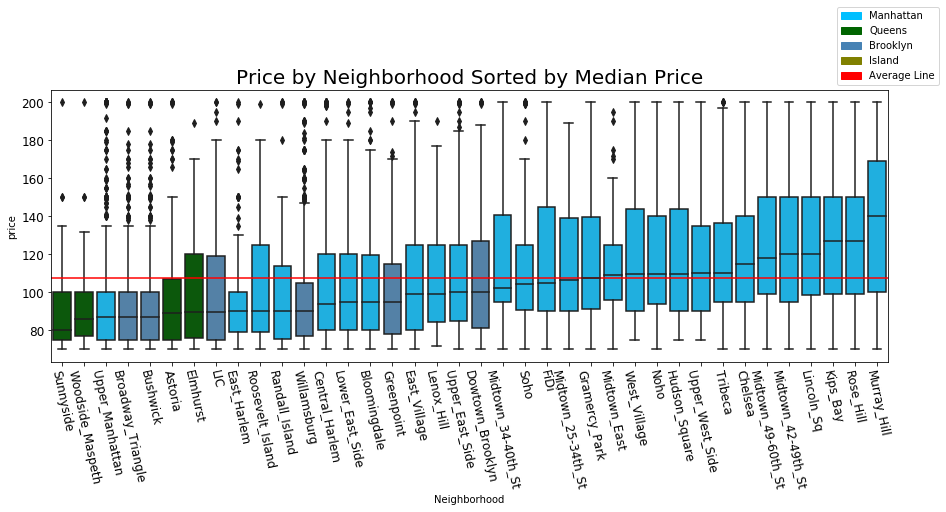

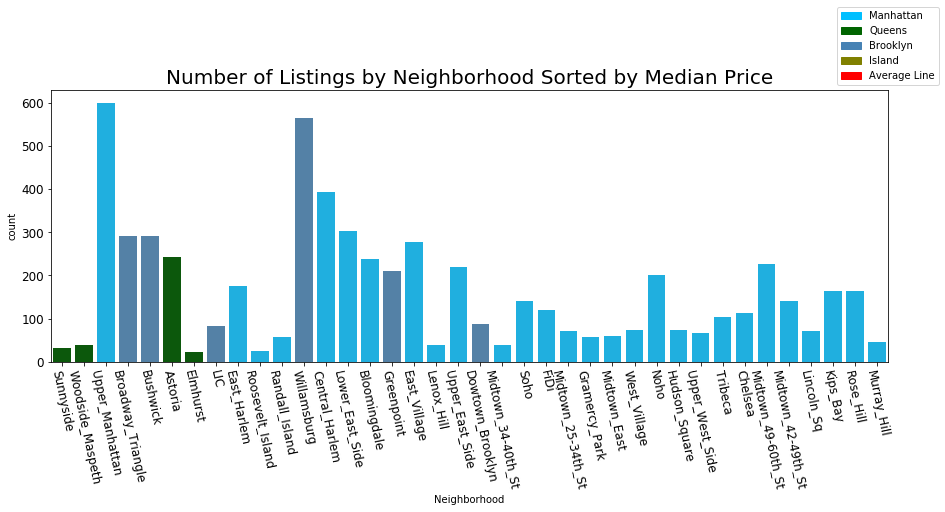

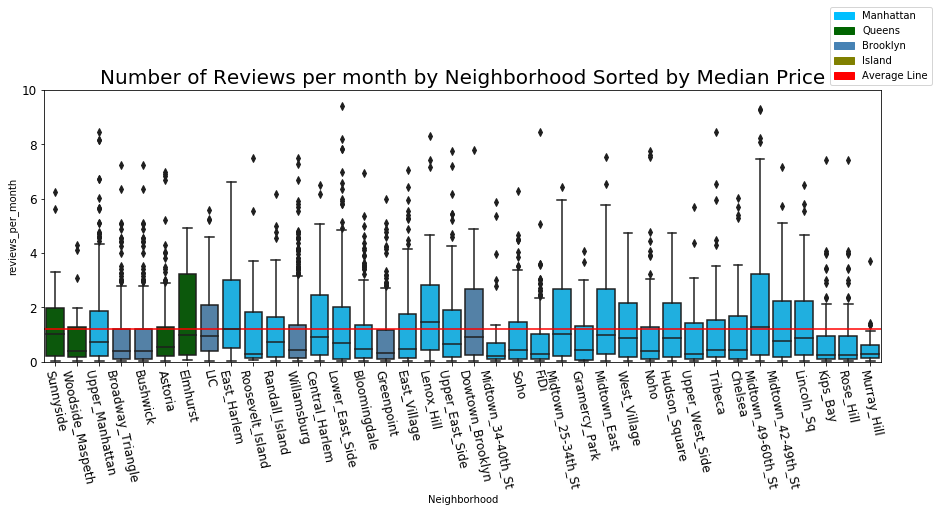

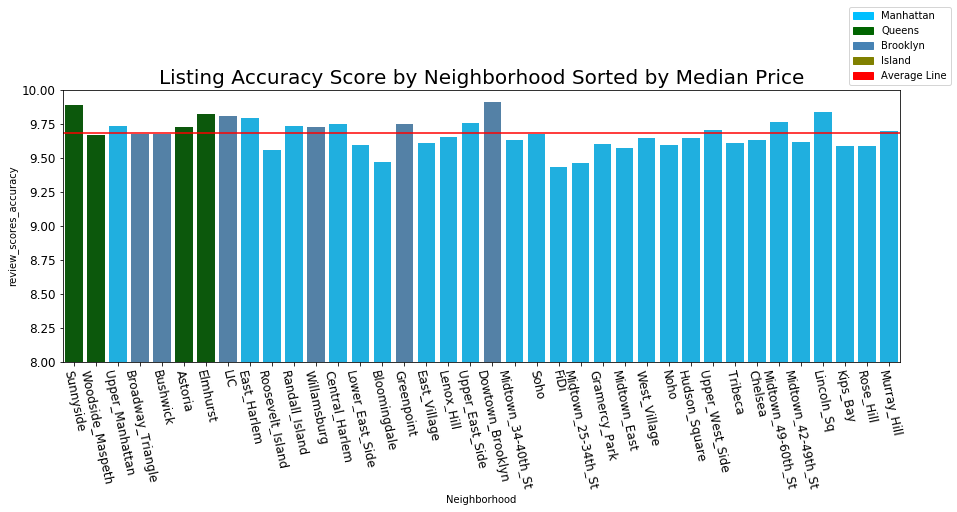

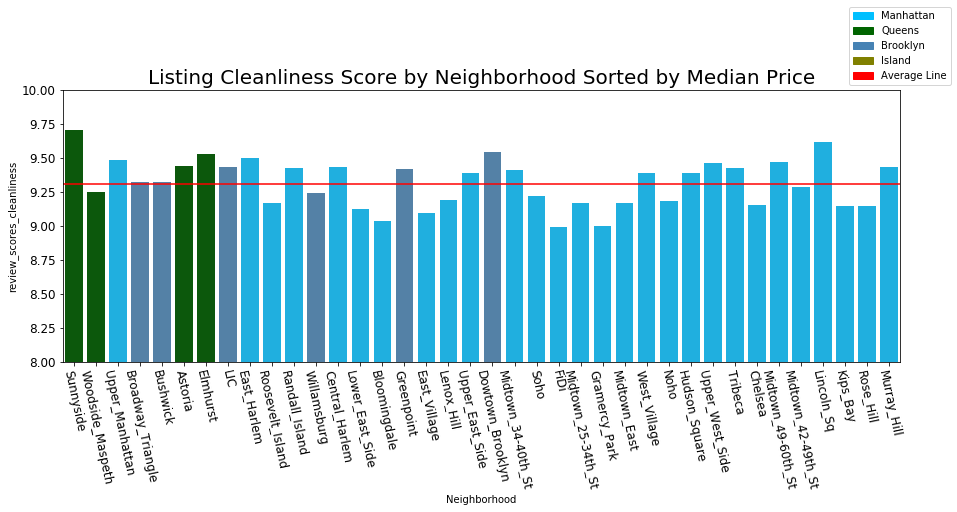

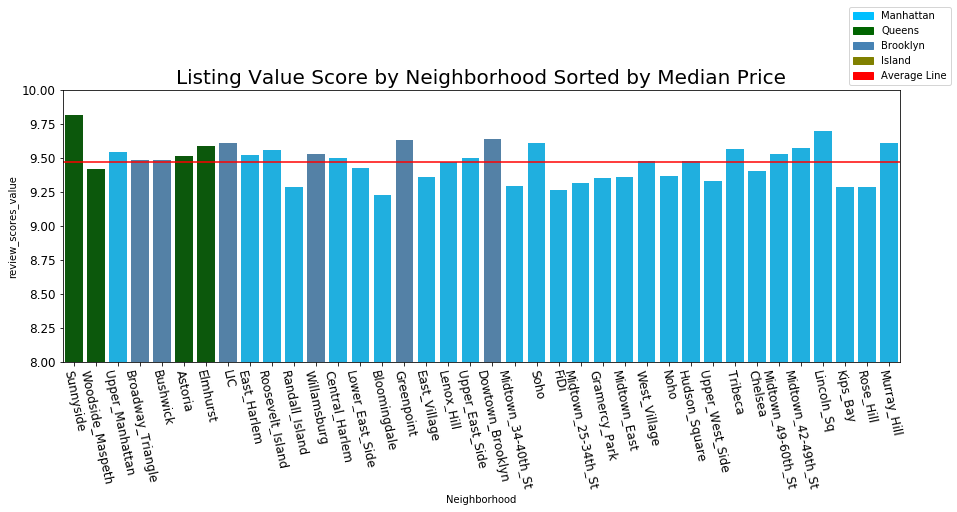

In [21]:
# Plot figure Size
plt.figure(figsize=(15,5))

# Plot legend
manhat_patch = mpatches.Patch(color='deepskyblue', label='Manhattan')
queens_patch = mpatches.Patch(color='darkgreen', label='Queens')
brooklyn_patch = mpatches.Patch(color='steelblue', label='Brooklyn')
island_patch = mpatches.Patch(color='olive', label='Island')
average_line = mpatches.Patch(color='r', label='Average Line')
handles = [manhat_patch, queens_patch, brooklyn_patch, island_patch, average_line]


                            # Price Boxplot
ax = sns.boxplot(x='Neighborhood', y='price', data=df_filtered, 
                 order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['price'].mean(), color='r', linestyle='-')
plt.title('Price by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)

                        # Number of Listings Boxplot
plt.figure(figsize=(15,5))

ax = sns.countplot(x='Neighborhood', data=df_filtered, 
                 order= boxplot_sorted_median, palette=color_series_plot)

# Format the plot
plt.title('Number of Listings by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                            # Reviews per month
plt.figure(figsize=(15,5))

ax = sns.boxplot(x='Neighborhood', y='reviews_per_month', data=df_filtered, 
                 order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['reviews_per_month'].mean(), color='r', linestyle='-')
plt.title('Number of Reviews per month by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([0, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                        # Host score quality Boxplot
plt.figure(figsize=(15,5))

neighborhood_score_accuracy = df_filtered.groupby(['Neighborhood'])['review_scores_accuracy'].mean().reset_index()

sns.barplot(x='Neighborhood', y='review_scores_accuracy', 
            data=neighborhood_score_accuracy, order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['review_scores_accuracy'].mean(), color='r', linestyle='-')
plt.title('Listing Accuracy Score by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([8, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                        # Host score quality Boxplot
plt.figure(figsize=(15,5))

neighborhood_score_accuracy = df_filtered.groupby(['Neighborhood'])['review_scores_cleanliness'].mean().reset_index()

sns.barplot(x='Neighborhood', y='review_scores_cleanliness', 
            data=neighborhood_score_accuracy, order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['review_scores_cleanliness'].mean(), color='r', linestyle='-')
plt.title('Listing Cleanliness Score by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([8, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)


                        # Host score quality Boxplot
plt.figure(figsize=(15,5))

neighborhood_score_accuracy = df_filtered.groupby(['Neighborhood'])['review_scores_value'].mean().reset_index()

sns.barplot(x='Neighborhood', y='review_scores_value', 
            data=neighborhood_score_accuracy, order= boxplot_sorted_median, palette=color_series_plot)

# Draw an average horizontal line
# Format the plot
plt.axhline(y=df_filtered['review_scores_value'].mean(), color='r', linestyle='-')
plt.title('Listing Value Score by Neighborhood Sorted by Median Price', color='black', fontsize=20)
plt.xticks(rotation=-78, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.ylim([8, 10])
plt.legend(handles=handles,
          loc='lower center', bbox_to_anchor=(1, 1), ncol=1)

### <font color='royalblue'>Analysis:</font>   

As you can see, there are 6 plots by Neighborhood which are sorted by median price per night. The borough is color coded as shown in the legend and the red line is the mean value of these neighorhoods. To avoid simplicity and bias, I chose these 3 rating scores (accuracy, cleanliness and value) as opposed to one overall rating score. The overall rating score is an average score of 5 ratings scores including location score, so I don't want to use neither of them. The distance factor will be considered in the second half of the project anyway. 

As you might have guessed, any neighborhood below Central Park has significantly higher price than Upper Manhattan, Brooklyn, Queens, Roosevelt and Randall Island. However, in this price range and type of room, the number of listings in "hot" area in Manhattan is not as many as other places. Also, there seems to be a large number of listings in Upper Manhattan and Williamsburg, but that is because those area in terms of size is much greater than Kips Bay for example. However, the size difference shouldn't skew the analysis by a lot.

The reviews per month plot says a lot about the quality of the listings in the area because Airbnb encourages guests to rate and leave feedback to the host to create a give-and-take community. For example, Willamsburg has a large number of listings, but the average number of review per month is only 1. There are 2 explanations. (1): Willamsburg area provides a lot of decent rooms but the quality is neither so good nor so bad that that previous guests didn't want to spend 5-10 minutes to review it. Or (2): Willamsburg has a lot of rooms but the renting frequency is not high, even though the average is lower than the of the city's. However, noted that Willamsburg a large area, so the outliers might be the listings located near East River yet the average is skewed by unoccupied rooms farther East. Anyhow, what causes the number of reviews in this area so low is beyond the scope of the analysis.

Another example is Midtown neighborhood from 25th to 34th St. For a very small number of listings in comparison to other neighborhood in the island, the rooms there sure receive a lot of reviews, and they seem to be bad reviews, as seen in the rating score barplots. In contrast, Midtown from 49th to 60th and Lincoln Sq receive many good reviews, even though their average price is similar to those in 25-34th St. This might be a sweet spot, but you still have to pay higher than average for this quality in the city.  

Surprisingly, Harlem area can provide the same above-average room quality in Manhattan but less pricy, plus their number of listings are quite enough for you to choose around. However, these areas, of course, are farther away from the city center obviously. 

Overall, among price, quality and distance, you can always get at most 2 out 3, and it's your choice to decide which 2 you want to take. There's another factor, or a sub-factor of the quality factor, that the data is not available here is the room size. Manhattan apartment rooms can be as brutally small as a closet. If size is available, I'm sure we can do even further interesting analysis. If you ever find a place with all qualities above, please kindly share it to me too :) 

# <font color='tomato'>Input:</font>    
### Enter Location

##### <font color='green'>Comment:</font>   

Moving on to the next analysis, for location, I'm going to choose the neighborhood with the lowest average price among other included neighborhood aboved, which is Sunnyside. The zipcode is 11104. 

In [22]:
print('the list of neighborhood sorted by median price per night: \n')
print(boxplot_sorted_median)

insert_neighborhood = input('\n Please select one neighborhood: ')
print('The zipcode(s) in this neighborhood are: \n' + 
      str(nyc_zipcode[nyc_zipcode['Neighborhood'] == insert_neighborhood]['zcta']) + 
      '\n Please select one zipcode for the input below \n')

the list of neighborhood sorted by median price per night: 

['Sunnyside', 'Woodside_Maspeth', 'Upper_Manhattan', 'Broadway_Triangle', 'Bushwick', 'Astoria', 'Elmhurst', 'LIC', 'East_Harlem', 'Roosevelt_Island', 'Randall_Island', 'Willamsburg', 'Central_Harlem', 'Lower_East_Side', 'Bloomingdale', 'Greenpoint', 'East_Village', 'Lenox_Hill', 'Upper_East_Side', 'Dowtown_Brooklyn', 'Midtown_34-40th_St', 'Soho', 'FiDi', 'Midtown_25-34th_St', 'Gramercy_Park', 'Midtown_East', 'West_Village', 'Noho', 'Hudson_Square', 'Upper_West_Side', 'Tribeca', 'Chelsea', 'Midtown_49-60th_St', 'Midtown_42-49th_St', 'Lincoln_Sq', 'Kips_Bay', 'Rose_Hill', 'Murray_Hill']

 Please select one neighborhood: Sunnyside
The zipcode(s) in this neighborhood are: 
119    11104
Name: zcta, dtype: object
 Please select one zipcode for the input below 



In [23]:
#Zipcode format is 5-digit string or number
def insert_airbnb_zipcode(zipcode):
    if (str(zipcode).isdigit()) & (len(str(zipcode)) == 5): 
        global yourairbnb_zipcode
        yourairbnb_zipcode = str(zipcode).strip()
        return print('Your airbnb zipcode is ' +  yourairbnb_zipcode)
    else: 
        return print('Your zipcode format is incorrect')

Insert your Airbnb zipcode here (5-digit number): 11104
Your airbnb zipcode is 11104


Text(0.5, 1.0, 'Your Airbnb room is in the highlighted area')

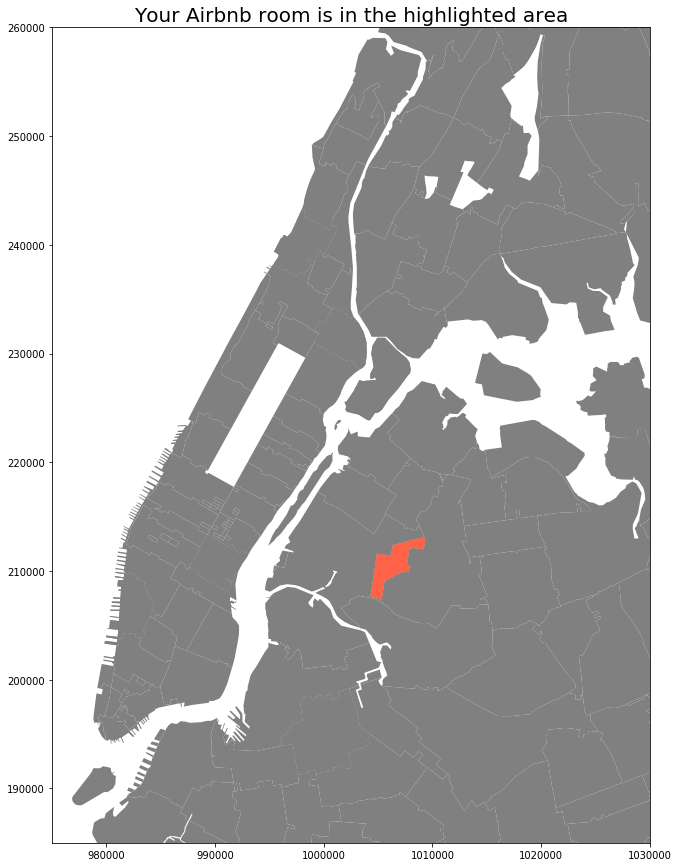

In [24]:
zipcode = input('Insert your Airbnb zipcode here (5-digit number): ')
insert_airbnb_zipcode(zipcode)

plt.figure(figsize=(15,15))

ax = plt.subplot()
x1 = nyc_zipcode.plot(ax=ax, color='grey')
x5 = nyc_zipcode[nyc_zipcode['zcta'] == zipcode].plot(ax=ax, color='tomato')

plt.ylim([185000, 260000])
plt.xlim([975000, 1030000])
plt.title("Your Airbnb room is in the highlighted area", fontsize=20, color='black')


#### Processing Input

Create your Airbnb Coordinate

In [25]:
# Create Airbnb zipcode cooridnate
yourairbnb_coord = nyc_zipcode.loc[nyc_zipcode['zcta'] == yourairbnb_zipcode, 
                                   'coordinate'].iloc[0]
your_airbnb = ['Your_airbnb']
your_airbnb.append(yourairbnb_coord)

Add your Airbnb Coordinate to the Attraction Table

In [26]:
attraction_coords = attraction_df[['zcta', 'Attractions','coordinate']]

# This makes sure we always delete the Airbnb row from previous iteration
attraction_coords[attraction_coords['Attractions'] != 'Your Airbnb']

# Create a new Airbnb row
your_airbnb_row = pd.DataFrame({'zcta': yourairbnb_zipcode, 
                                'Attractions': 'Your Airbnb', 
                                'coordinate': [(yourairbnb_coord)]})

# Add the Airbnb row to the DF
attraction_coords = pd.concat([your_airbnb_row, attraction_coords]).reset_index(drop=True)

# Create a coordinate-only list for optimization model 
coords_list = [list([attraction_coords['Attractions'][i],
                     attraction_coords['coordinate'][i]]) 
               for i in range(len(attraction_coords))]

#### List of Attractions & Your Aibnb

In [27]:
attraction_coords

,zcta,Attractions,coordinate
0,11104,Your Airbnb,"(40.7436, -73.9216)"
1,10001,Empire State Building,"(40.7484, -73.9967)"
2,10005,Wall St / Statue of Liberty,"(40.7056, -74.0083)"
3,10007,One Trade Center,"(40.7139, -74.007)"
4,10011,Chelsea Market / High Line,"(40.7402, -73.9996)"
5,10012,Washington Square Park / NYU,"(40.7255, -73.9983)"
6,10017,Grand Central,"(40.7517, -73.9707)"
7,10018,Bryant Park,"(40.7547, -73.9925)"
8,10019,Columbus Circle / Fordham,"(40.7651, -73.9858)"
9,10027,Harlem / Columbia University,"(40.8116, -73.955)"


##### <font color='green'>Comment:</font>   

From this point, the sequence of the itinerary is according to the index in this table. For example, if the value of the first index in a list of sequence is 0, that means the Airbnb Zipcode. If the second index value is 10, it means MET, according to the table above  

# <font color='tomato'>Input:</font>    
### Plan Your Itinerary

##### <font color='green'>Comment:</font>     
    
- From this the attraction table above, enter the attraction visiting order starting from the Airbnb zipcode.
- You can type the keyword of the attraction. E.g Empire State Building can be 'empire'. Please make sure you type correctly and one time for each attractions. Separate the keywords by comma
- In the attraction list that I created, there are 13 attraction locations. If you use this list, please make sure you enter all 13 locations. If you want to add or remove location, change it here and now
- For my analysis, I'm going to put the sequence as following (by keyword): met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo
- If you want to use my itinerary, copy and paste it to the cell below

In [28]:
your_attraction_raw_input = input("Enter your attraction visit order with keyword e.g Empire State Building can be input as empire \n Separated each value by comma \n")

Enter your attraction visit order with keyword e.g Empire State Building can be input as empire 
 Separated each value by comma 
met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo


#### Processing Input

In [29]:
# split the input by comma
your_attraction_input = your_attraction_raw_input.split(',')

# format the string from both your input and the coordinate table
your_attraction_input1 = [str(your_attraction_input[i]).strip().lower() for i in range(len(your_attraction_input))]
attraction_coords['Attractions_lower'] = attraction_coords['Attractions'].str.lower()

# populate the zipcode from your input
your_attraction_input2 = [attraction_coords['zcta'][0]]
for i in range(len(your_attraction_input1)):
    your_attraction_input2.append(attraction_coords.loc[attraction_coords['Attractions_lower'].str.\
                                                    contains(your_attraction_input1[i]), 'zcta'].item())
    
# missing input attractions
missing_attraction = list(np.setdiff1d(attraction_coords['zcta'].tolist(), your_attraction_input2))
missing_list = attraction_coords['Attractions'][attraction_coords['zcta'].isin(missing_attraction)]

print('You have entered: \n')
print(your_attraction_raw_input +'\n')
print(str(your_attraction_input2) +'\n')
print(str(len(your_attraction_input)) + ' attractions out of ' 
          + str((len(attraction_coords) -1)))

You have entered: 

met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo

['11104', '10028', '10027', '10019', '10111', '10018', '10017', '10036', '10001', '10011', '10012', '10007', '10005', '11201']

13 attractions out of 13


# <font color='tomato'>Preparation:</font>

### Prepare for Plotting

Create Attractions DF for plotting & Save the DF to dbf file for GeoPandas plotting

In [30]:
attractions_geomap = nyc_zipcode[nyc_zipcode['zcta'].isin(list(set(attraction_coords['zcta'])))]

attractions_geomap1 = attractions_geomap[attractions_geomap.columns[ : len(attractions_geomap.columns) - 1]]

tour_area0 = gpd.GeoDataFrame(attractions_geomap1, geometry='geometry')

tour_area0.to_file(local_dic + 'Shapefiles and base map/ tour_area.dbf')

### Function: Calculate Distance between Zipcodes

In [31]:
# calculate the distance
def calc_distance(zipcode_order_list):
    dist = pgeocode.GeoDistance('us')
    distance_km = []
    for i in range(len(zipcode_order_list)): 
        distance_km.append(dist.query_postal_code(zipcode_order_list[i],
                                                  zipcode_order_list[i+1 if i+1<len(zipcode_order_list) 
                                                                                                 else 0]))

    distance_mile = [x * km_to_mile for x in distance_km]
    return round(sum(distance_mile),2)

### Function: Convert Attraction Order Index to Zipcode Order

In [32]:
def convert_seq_to_zipcode(attracion_seq):
    zipcode_seq = []
    for i in range(len(attracion_seq)):
        zipcode_seq.append(attraction_coords['zcta'][attracion_seq[i]])
    return zipcode_seq    

# <font color='tomato'>Output:</font>
### Visualize Itinerary on Map

Insert  Itinerary to the Distance Calculation Function

In [33]:
zipcode_order_list = your_attraction_input2

your_route_length = calc_distance(zipcode_order_list)

print_your_route_length = 'Your route length is ' + str(your_route_length) +  ' mile'

Populate the correct route order back to the tour_area df for plotting

In [34]:
your_route_order_table = pd.DataFrame(your_attraction_input2, columns=['zipcode']).reset_index()

# Merge the route_order table to the tour_area df
your_tour_area = tour_area0.merge(your_route_order_table, left_on='zcta', right_on='zipcode', how='left')
your_tour_area.rename(columns={'index': 'route_order'}, inplace=True)

###### Populate the Plot

Your route length is 22.77 mile


Your Trip Itinerary
met, harlem, columbus, rockefeller, bryant, grand, times, empire, chelsea, nyu, one, wall, dumbo


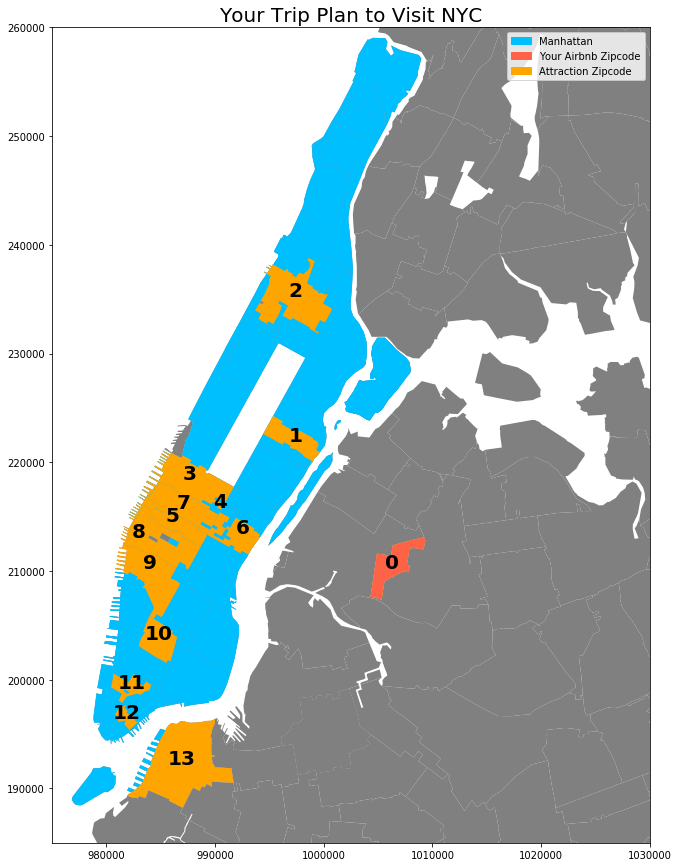

In [35]:
plt.figure(figsize=(15,15))

ax = plt.subplot()
x1 = nyc_zipcode.plot(ax=ax, color='grey')
x2 = manhat.plot(ax=ax, color='deepskyblue')
x3 = your_tour_area.plot(ax=ax, color='orange')
x4 = your_tour_area[your_tour_area['zcta'] == yourairbnb_zipcode].plot(ax=ax, color='tomato')

plt.ylim([185000, 260000])
plt.xlim([975000, 1030000])
plt.title("Your Trip Plan to Visit NYC", fontsize=20, color='black')

# label the legend
teal_patch = mpatches.Patch(color='deepskyblue', label='Manhattan')
red_patch = mpatches.Patch(color='tomato', label='Your Airbnb Zipcode')
orange_patch = mpatches.Patch(color='orange', label='Attraction Zipcode')

plt.legend(handles=[teal_patch, red_patch, orange_patch])

# label the route order
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
your_tour_area['coords'] = your_tour_area['geometry'].apply(lambda x: x.representative_point().coords[:])
your_tour_area['coords'] = [coords[0] for coords in your_tour_area['coords']]

for idx, row in your_tour_area.iterrows():
    plt.annotate(s=row['route_order'], xy=row['coords'], 
                 horizontalalignment='center', fontweight='bold', fontsize='20')
    
# print total distance
print(print_your_route_length)
# Your manual route order
print('\n')
print('Your Trip Itinerary')
print(your_attraction_raw_input)

# <font color='tomato'>Optimization Model:</font>
### Find Shortest Itinerary

### Travelling Salesperson Model

##### <font color='green'>Comment:</font>   
The travelling salesperson problem (TSP) is a classic optimization problem where the goal is to determine the shortest tour of a collection of n “cities” (i.e. nodes), starting and ending in the same city and visiting all of the other cities exactly once. 

- Because the algoritm's goal is to calculate the shortest distance, it doesn't matter where we start as long as we follow the correct sequence order 

- The sequence number represents the index of the attractions in the attraction_coords table above 

https://mlrose.readthedocs.io/en/stable/source/tutorial2.html

In [36]:
def opt_tsp_seq(mutation_prob_input, random_state_input, max_attempts_input):
    # Initialize fitness function object using coords_list
    fitness_coords = mlrose.TravellingSales(coords = 
                                           [coords_list[i][1] for i in 
                                            range(len(coords_list))])

    # Define optimization problem object
    problem_fit = mlrose.TSPOpt(length = len(coords_list), 
                                fitness_fn = fitness_coords, maximize=False)

    # Solve problem using the genetic algorithm
    attraction_order, best_fitness = mlrose.genetic_alg(problem_fit, 
                                                        mutation_prob = mutation_prob_input,
                                                        random_state = random_state_input,
                                                        max_attempts = max_attempts_input)

    return [list(attraction_order), best_fitness]

### <font color='tomato'>Input:</font>
#### Algorithm Parameters

##### <font color='green'>Comment:</font>   
If this is your first run of the notebook, then use these following paramters: 

I ran a loop to plug in various combination of paramter to derive the shortest distance. The loop code block will be at the end of the notebook so the notebook could run the whole project first, while you're reading the code the loop code can run in the background

In [37]:
model_attraction_order = opt_tsp_seq(mutation_prob_input = .8, 
                                     random_state_input = 10, 
                                     max_attempts_input = 300)

### <font color='tomato'>Output:</font>
#### Calculate Distance from the TSP Model Itinerary

Modify the Sequence Order

In [38]:
attraction_list_1 = list(model_attraction_order[0])

# First part is from 0 to end the list
# Second part is adding from beginning of the list to last number before 0
tsp_model_route1 = attraction_list_1[attraction_list_1.index(0) : ] + \
                attraction_list_1[ : attraction_list_1.index(0)] 

In [39]:
tsp_model_order1 = []

# order of the optimal result starting from airbnb    
for index, value in enumerate(tsp_model_route1):
    value = coords_list[tsp_model_route1[index]][0]
    tsp_model_order1.append(value)
    print(index, value)

0 Your Airbnb
1 Grand Central
2 Columbus Circle / Fordham
3 Rockefeller Building
4 Chelsea Market / High Line
5 One Trade Center
6 Wall St / Statue of Liberty
7 Brooklyn Bridge / DUMBO
8 Washington Square Park / NYU
9 Bryant Park
10 Times Sq
11 Empire State Building
12 Harlem / Columbia University
13 MET


Plug the sequence to the function

In [40]:
tsp_model_zipcode_seq = convert_seq_to_zipcode(tsp_model_route1)

zipcode_order_list = tsp_model_zipcode_seq

tsp_model_length = calc_distance(zipcode_order_list)

print_tsp_model_length = 'TSP model route length is ' + str(tsp_model_length) +  ' mile'

print(print_tsp_model_length)

TSP model route length is 25.38 mile


###### Pre-Plotting

In [41]:
# Populate the correct route order back to the tour_area df for plotting
model_route_order = []

for index in range(len(tsp_model_route1)):
    model_route_order.append(attraction_coords['zcta'][tsp_model_route1[index]])

model_route_order_table = pd.DataFrame(model_route_order, columns=['zipcode']).reset_index()

# Merge the route_order table to the tour_area df
model_tour_area = tour_area0.merge(model_route_order_table, left_on='zcta', right_on='zipcode', how='left')
model_tour_area.rename(columns={'index': 'route_order'}, inplace=True)

TSP model route length is 25.38 mile


['Your Airbnb', 'Grand Central', 'Columbus Circle / Fordham', 'Rockefeller Building', 'Chelsea Market / High Line', 'One Trade Center', 'Wall St / Statue of Liberty', 'Brooklyn Bridge / DUMBO', 'Washington Square Park / NYU', 'Bryant Park', 'Times Sq', 'Empire State Building', 'Harlem / Columbia University', 'MET']


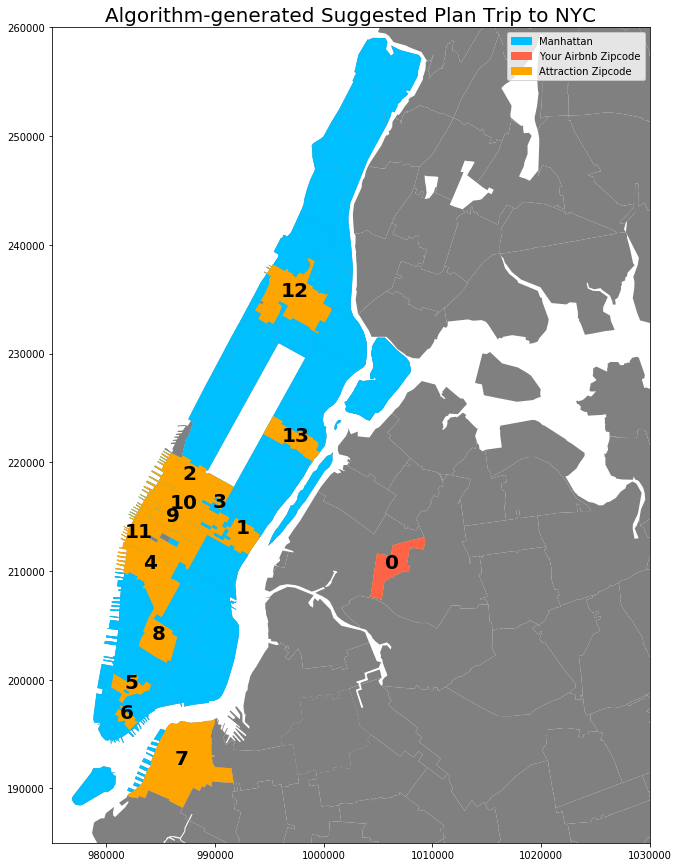

In [42]:
plt.figure(figsize=(15,15))

ax = plt.subplot()
x1 = nyc_zipcode.plot(ax=ax, color='grey', legend=True)
x2 = manhat.plot(ax=ax, color='deepskyblue', legend=True)
x3 = model_tour_area.plot(ax=ax, color='orange', legend=True)
x4 = model_tour_area[model_tour_area['zcta'] == yourairbnb_zipcode].plot(ax=ax, color='tomato')

plt.ylim([185000, 260000])
plt.xlim([975000, 1030000])
plt.title("Algorithm-generated Suggested Plan Trip to NYC", fontsize=20, color='black')

# label the legend
teal_patch = mpatches.Patch(color='deepskyblue', label='Manhattan')
red_patch = mpatches.Patch(color='tomato', label='Your Airbnb Zipcode')
orange_patch = mpatches.Patch(color='orange', label='Attraction Zipcode')

plt.legend(handles=[teal_patch, red_patch, orange_patch])


# label the route order
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
model_tour_area['coords'] = model_tour_area['geometry'].apply(lambda x: x.representative_point().coords[:])
model_tour_area['coords'] = [coords[0] for coords in model_tour_area['coords']]

for idx, row in model_tour_area.iterrows():
    plt.annotate(s=row['route_order'], xy=row['coords'], 
                 horizontalalignment='center', fontweight='bold', fontsize='20')

# print shortest distance
print(print_tsp_model_length)
# algorithm route order
print('\n')
print(tsp_model_order1)

In [43]:
print(print_your_route_length)
print(print_tsp_model_length)

if tsp_model_length < your_route_length:
    print('Computer won')
else:
    print('Congratulations! You won')

Your route length is 22.77 mile
TSP model route length is 25.38 mile
Congratulations! You won


### <font color='royalblue'>Analysis:</font>   
I'm certainly positive that you KNOW your itinerary is the BEST route possible. Congratulations if you beat the computer by a mile !!! If not, it's OK because the computer has failed thousands of times before reaching to this level

The fact that the TSP model result is not as good as yours might be because of the the parameters we set for the model. The TSP is a hyperparameter model, meaning it requires external parameter configuration from user, and these values cannot be estimated. The model result might be the local best value within those parameters, yet it might not be the global best value as yours might be.

This is a major drawbacks of the model. The more nodes we add to the model the more computationally expensive and lower chance of yielding the global optimal result.  

After many attempts, I found out that these followings parameters yield the best result:
- Mutation Probability is as high as 0.8
- Maximum attempts should be below 500. Anything above that won't yield better result but rather slow the model down
- Random state should be as low as 10

### <font color='tomato'>Bonus:</font>
### Find the Best Paramter Configuration for the Optimization Model

##### <font color='green'>Comment:</font>   

The best way to find out the optimal config is apply the grid approach, meaning we will test many combination of the parameters and compare the result

This step takes a lot of time, yet it doesn't guarantee the more combinations (more time) we run and test, the model will yield better result.

In this case, I set the mutation probablity ranging from 0 to 100%, and random sate is from 0 to 50 with increment of 10. The maximum attempt will be fixed or manually changed. I set it to 300. You can change any of this paramter choices. 

The result will be the total distance of the route, you can use that to compare with previous runs you did or with your manual itinerary
https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models

In [44]:
run_find_opt_config = input('Do you wish to continue? This code block below will take a lot of time. Type "y" to run the cell. Other inputs will not run: \n')
if run_find_opt_config == 'y': 
    mutation_prob_range = range(0, 10)
    random_state_input = range(0, 10)
    opt_seq_combination = []

    parameter_comb = [[x,y] for x in mutation_prob_range for y in random_state_input]

    for i in range(len(parameter_comb)):
        opt_seq_combination.append(opt_tsp_seq(mutation_prob_input= parameter_comb[i][0] /10 , 
                                     random_state_input=parameter_comb[i][1], 
                                     max_attempts_input=200)) #manually change this value ranging 100-500)
    opt_seq_comb_result = []
    for i in range(len(opt_seq_combination)):
        opt_seq_comb_result.append([parameter_comb[i],
                                opt_seq_combination[i][0],
                                calc_distance(convert_seq_to_zipcode(opt_seq_combination[i][0]))])
    print(opt_seq_comb_result)    
else: 
    pass

Do you wish to continue? This code block below will take a lot of time. Type "y" to run the cell. Other inputs will not run: 
no


# <font color='tomato'>Conclusion:</font>

- The relationship between price, quality and distance is not linear. Higher price or good location doesn't guarantee good quality. 
- It is computationally expensive to define the optimal parameters for the optimization model. The model's result might not be the optimal solution 

                                                #End of Notebook